In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [45]:
model_params = {
  'svm': {
    'model': SVC(),
    'params': {
      'C': [1,5,10,20],
      'kernel': ['rbf', 'poly', 'linear', 'sigmoid', 'scale'],
      'gamma': ['auto', 'scale']
    }
  },
  'random_forest': {
    'model': RandomForestClassifier(),
    'params': {
      'n_estimators': [1,5,10,20],
      'criterion': ['gini', 'entropy']
    }
  },
  'logistic_regression': {
    'model': LogisticRegression(),
    'params': {
      'C': [1,5,10,20],
    }
  },
  'decision_tree_classifier': {
    'model': DecisionTreeClassifier(),
    'params': {
      'criterion': ["gini", "entropy", "log_loss"],
    }
  },
  'gaussian_naive_bayes': {
    'model': GaussianNB(),
    'params': {}
  },
  'multinomial_naive_bayes': {
    'model': MultinomialNB(),
    'params': {}
  },
}

In [46]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(digits.data, digits.target)
  scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_,
    'best_model': clf.best_estimator_
  })

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\User

In [47]:
import pandas as pd
scores_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_model'])

In [48]:
scores_df

,model,best_score,best_params,best_model
0,svm,0.973850,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}",SVC(C=5)
1,random_forest,0.926571,"{'criterion': 'gini', 'n_estimators': 20}","(DecisionTreeClassifier(max_features='sqrt', r..."
2,logistic_regression,0.913765,{'C': 1},LogisticRegression(C=1)
3,decision_tree_classifier,0.815829,{'criterion': 'entropy'},DecisionTreeClassifier(criterion='entropy')
4,gaussian_naive_bayes,0.806928,{},GaussianNB()
5,multinomial_naive_bayes,0.870350,{},MultinomialNB()


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

model = SVC(C=5, gamma='scale', kernel='rbf')
model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",5
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [51]:
model.predict(X_test)

array([0, 4, 7, 8, 5, 1, 1, 1, 7, 0, 1, 8, 0, 3, 8, 7, 8, 0, 6, 5, 4, 5,
       2, 7, 6, 4, 6, 5, 1, 2, 6, 6, 6, 0, 4, 6, 0, 9, 8, 6, 2, 1, 1, 0,
       1, 1, 0, 5, 8, 6, 0, 3, 0, 5, 0, 8, 9, 7, 8, 4, 9, 3, 7, 7, 6, 2,
       0, 2, 5, 6, 7, 8, 7, 1, 7, 5, 6, 3, 9, 2, 1, 9, 7, 0, 4, 4, 3, 2,
       1, 2, 2, 7, 3, 6, 9, 4, 3, 3, 0, 4, 1, 0, 0, 5, 6, 6, 9, 8, 8, 3,
       9, 6, 1, 9, 6, 4, 5, 5, 8, 5, 4, 5, 3, 4, 3, 5, 1, 9, 4, 1, 4, 9,
       3, 8, 0, 5, 7, 6, 3, 2, 8, 7, 3, 6, 5, 0, 5, 2, 1, 8, 3, 3, 9, 4,
       1, 6, 3, 5, 2, 7, 2, 7, 8, 8, 4, 5, 1, 2, 0, 3, 2, 0, 4, 8, 4, 3,
       3, 1, 0, 8, 7, 0, 2, 9, 1, 4, 0, 1, 9, 8, 0, 7, 0, 6, 7, 5, 9, 3,
       7, 3, 3, 6, 1, 7, 9, 1, 3, 3, 4, 8, 2, 6, 6, 2, 2, 4, 9, 1, 6, 6,
       5, 5, 0, 3, 5, 7, 8, 4, 3, 6, 5, 9, 0, 9, 9, 5, 2, 1, 4, 8, 0, 0,
       1, 4, 7, 2, 9, 6, 3, 0, 0, 3, 3, 1, 3, 7, 6, 1, 5, 5, 9, 7, 9, 5,
       9, 1, 6, 1, 2, 6, 6, 2, 0, 6, 1, 0, 6, 5, 8, 3, 9, 3, 5, 8, 4, 1,
       9, 8, 3, 5, 0, 8, 3, 6, 2, 7, 1, 1, 0, 9, 8,

In [52]:
y_test

array([0, 4, 7, 8, 5, 1, 1, 1, 7, 0, 1, 8, 0, 3, 8, 7, 8, 0, 6, 5, 4, 5,
       2, 7, 6, 4, 6, 5, 1, 2, 6, 6, 6, 0, 4, 6, 0, 9, 8, 6, 2, 1, 1, 0,
       1, 1, 0, 5, 8, 6, 0, 3, 0, 5, 0, 8, 9, 7, 8, 4, 9, 3, 7, 7, 6, 2,
       0, 2, 5, 6, 7, 8, 7, 1, 7, 5, 6, 3, 9, 2, 1, 9, 7, 0, 4, 4, 3, 2,
       1, 2, 2, 7, 3, 6, 9, 4, 3, 3, 0, 4, 1, 0, 0, 5, 6, 6, 9, 8, 8, 3,
       9, 6, 1, 9, 6, 4, 5, 5, 8, 5, 4, 5, 3, 4, 3, 5, 1, 9, 4, 1, 4, 9,
       3, 8, 0, 5, 7, 6, 3, 2, 8, 7, 3, 6, 5, 0, 5, 2, 1, 8, 3, 3, 9, 4,
       1, 6, 3, 5, 2, 7, 2, 7, 8, 8, 4, 5, 1, 2, 0, 3, 2, 0, 4, 8, 4, 3,
       3, 1, 0, 8, 7, 0, 2, 9, 1, 4, 0, 1, 9, 8, 0, 7, 0, 6, 7, 5, 9, 3,
       7, 3, 3, 6, 1, 7, 9, 1, 3, 3, 4, 8, 2, 6, 6, 2, 2, 4, 9, 1, 6, 6,
       5, 5, 0, 3, 5, 7, 8, 4, 3, 6, 5, 9, 0, 9, 9, 5, 2, 1, 4, 8, 0, 0,
       1, 4, 7, 2, 9, 6, 3, 0, 0, 3, 3, 1, 3, 7, 6, 1, 5, 5, 9, 7, 9, 5,
       9, 1, 6, 1, 2, 6, 6, 2, 0, 6, 1, 0, 6, 5, 8, 3, 9, 3, 5, 8, 4, 1,
       9, 8, 3, 5, 0, 8, 3, 6, 2, 7, 1, 1, 0, 9, 8,

In [57]:
model.score(X_test, y_test)

0.9888888888888889

In [54]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

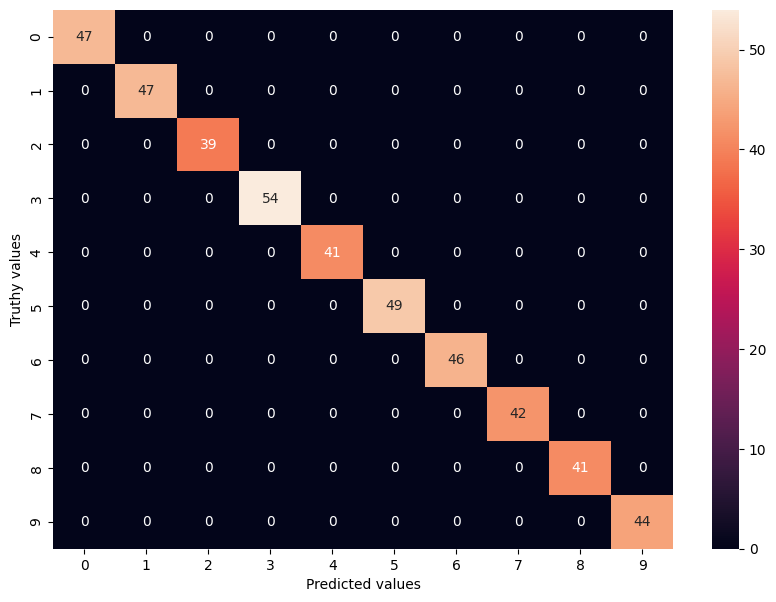

In [58]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truthy values')
plt.show()

In [61]:
print("My best score is from SVC with 97.3% accuracy and params: (C=5, gamma='scale', kernel='rbf')")

My best score is from SVC with 97.3% accuracy and params: (C=5, gamma='scale', kernel='rbf')
